In [ ]:
!pip install geopandas
!pip install descartes


     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 6.3 MB 49.9 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
vehTrips = pd.read_parquet('/content/Vehicle Report Activity.parquet')

In [ ]:
vehTrips.columns

Index(['UNIT NO', 'DEPOT ZIPCODE', 'DISTANCE', 'DATE', 'START COORDINATES',
       'FIRST ADDRESS', 'LAST ADDRESS', 'END COORDINATES', 'UTILIZATION',
       'YEAR - MAKE - MODEL', 'FUEL CONSUMPTION'],
      dtype='object')

In [ ]:
vehTrips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   UNIT NO              100000 non-null  object        
 1   DEPOT ZIPCODE        100000 non-null  int64         
 2   DISTANCE             100000 non-null  float64       
 3   DATE                 100000 non-null  datetime64[ns]
 4   START COORDINATES    99991 non-null   object        
 5   FIRST ADDRESS        66658 non-null   object        
 6   LAST ADDRESS         74344 non-null   object        
 7   END COORDINATES      100000 non-null  object        
 8   UTILIZATION          100000 non-null  float64       
 9   YEAR - MAKE - MODEL  100000 non-null  object        
 10  FUEL CONSUMPTION     100000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 8.4+ MB


In [ ]:
from shapely.geometry import Point
gpd.GeoSeries(Point(1,1))

0    POINT (1.00000 1.00000)
dtype: geometry

In [ ]:
gs = gpd.GeoSeries([Point(1,1), Point(2,3)])

In [ ]:
gs

0    POINT (1.00000 1.00000)
1    POINT (2.00000 3.00000)
dtype: geometry

In [ ]:
s = gpd.GeoSeries(
    [Point(1, 1), Point(2, 2), Point(3, 3)], crs="EPSG:3857"
)


In [ ]:
s.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
s = gpd.GeoSeries(
   [Point(1, 1), Point(2, 2), Point(3, 3)], index=["a", "b", "c"], crs=4326
)
s

a    POINT (1.00000 1.00000)
b    POINT (2.00000 2.00000)
c    POINT (3.00000 3.00000)
dtype: geometry

In [ ]:
from shapely.geometry import Polygon

In [ ]:
path_to_data = gpd.datasets.get_path('nybb')

In [ ]:
gdf = gpd.read_file(path_to_data)

In [ ]:
gdf.head(3)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."


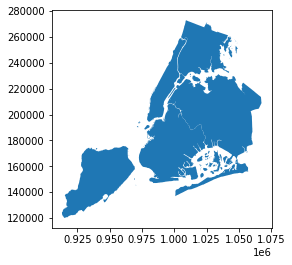

In [ ]:
# gdf['geometry'][2]
gdf.plot()

In [ ]:
gdf.index = gdf['BoroName']

In [ ]:
gdf.head(2)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
BoroName,,,,,
Staten Island,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
Queens,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."


In [ ]:
gdf.area

BoroName
Staten Island    1.623822e+09
Queens           3.045214e+09
Brooklyn         1.937478e+09
Manhattan        6.364712e+08
Bronx            1.186926e+09
dtype: float64

In [ ]:
gdf['B-Area'] =gdf.area

In [ ]:
gdf['Boundary of Polygon'] = gdf.boundary

In [ ]:
gdf['Centroid of Polygon'] = gdf.centroid

In [ ]:
#Calculating distance of each centroid from 
#the reference (first) point

In [ ]:
first_point = gdf['Centroid of Polygon'].iloc[0]
gdf['Distance'] = gdf['Centroid of Polygon'].distance(first_point)

In [ ]:
gdf['Distance']

BoroName
Staten Island         0.000000
Queens           103781.535276
Brooklyn          61674.893421
Manhattan         88247.742789
Bronx            126996.283623
Name: Distance, dtype: float64

In [ ]:
#All pandas utilities can be worked the same way,
# since gdf is also a pandas dataframe

## Making maps

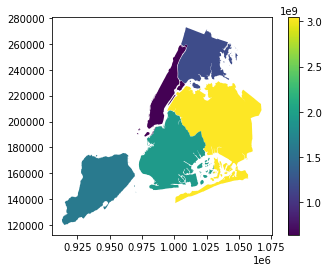

In [ ]:
gdf.plot('B-Area', legend=True)

In [ ]:
#We can set our active geometry to a differnt one. 

gdf = gdf.set_geometry('Centroid of Polygon')

In [ ]:
#centroid column is just a Point geometry g-series
gdf['Centroid of Polygon']

BoroName
Staten Island     POINT (941639.450 150931.991)
Queens           POINT (1034578.078 197116.604)
Brooklyn          POINT (998769.115 174169.761)
Manhattan         POINT (993336.965 222451.437)
Bronx            POINT (1021174.790 249937.980)
Name: Centroid of Polygon, dtype: geometry

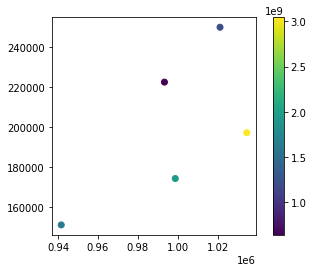

In [ ]:
gdf.plot('B-Area',legend=True)

### Plotting Two Geoseries/Geometries on top of each other.

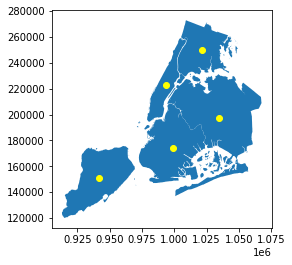

In [ ]:
ax = gdf['geometry'].plot()

gdf['Centroid of Polygon'].plot(ax=ax, color='yellow')

In [ ]:
gdf.index

Index(['Staten Island', 'Queens', 'Brooklyn', 'Manhattan', 'Bronx'], dtype='object', name='BoroName')

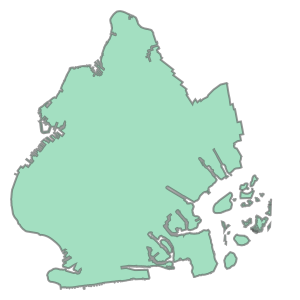

In [ ]:
brooklyn = gdf.loc['Brooklyn', 'geometry']

brooklyn

In [ ]:
type(brooklyn)

shapely.geometry.multipolygon.MultiPolygon

In [ ]:
gdf.columns

Index(['BoroCode', 'BoroName', 'Shape_Leng', 'Shape_Area', 'geometry',
       'B-Area', 'Boundary of Polygon', 'Centroid of Polygon', 'Distance'],
      dtype='object')

In [ ]:
gdf['geometry'].intersects(brooklyn)

BoroName
Staten Island    False
Queens            True
Brooklyn          True
Manhattan         True
Bronx            False
dtype: bool

## Bufferred Geometry 

> Geometry shifted by a buffer margin.

In [ ]:
gdf = gdf.set_geometry('geometry')

In [ ]:
gdf['Buffered-G'] = gdf.buffer(10000)

In [ ]:

gdf['Buffered-C'] = gdf['Centroid of Polygon'].buffer(10000)

<Figure size 576x576 with 0 Axes>

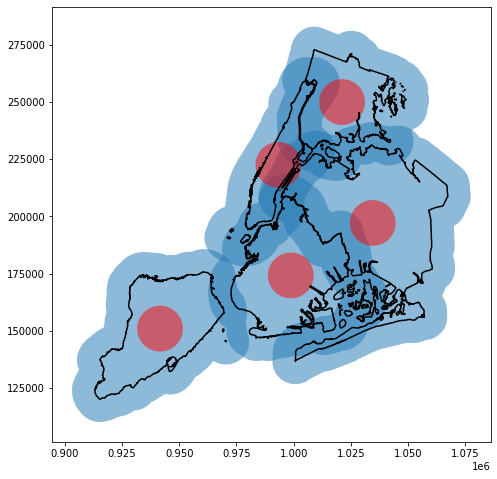

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
ax= gdf['Buffered-G'].plot(alpha=0.5, figsize=(8,8))

gdf['Buffered-C'].plot(ax=ax, color='red',alpha=0.5)

gdf['Boundary of Polygon'].plot(ax=ax, color='k')

In [ ]:
#If we wanna check which locations touch within 10,000 ft from brooklyn.

gdf['Touches Brooklyn Buffer'] = gdf['Buffered-G'].intersects(brooklyn)

In [ ]:
gdf.head(5)

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,B-Area,Boundary of Polygon,Centroid of Polygon,Distance,Buffered-G,Buffered-C,Touches Brooklyn Buffer
BoroName,,,,,,,,,,,,
Staten Island,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",1.623822e+09,"MULTILINESTRING ((970217.022 145643.332, 97022...",POINT (941639.450 150931.991),0.000000,"POLYGON ((903234.894 123347.784, 903178.057 12...","POLYGON ((951639.450 150931.991, 951591.298 14...",True
Queens,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",3.045214e+09,"MULTILINESTRING ((1029606.077 156073.814, 1029...",POINT (1034578.078 197116.604),103781.535276,"POLYGON ((1066963.473 157602.686, 1067059.264 ...","POLYGON ((1044578.078 197116.604, 1044529.926 ...",True
Brooklyn,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",1.937478e+09,"MULTILINESTRING ((1021176.479 151374.797, 1021...",POINT (998769.115 174169.761),61674.893421,"POLYGON ((962679.120 165570.385, 962651.330 16...","POLYGON ((1008769.115 174169.761, 1008720.962 ...",True
Manhattan,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",6.364712e+08,"MULTILINESTRING ((981219.056 188655.316, 98094...",POINT (993336.965 222451.437),88247.742789,"POLYGON ((980499.119 178448.735, 979864.868 17...","POLYGON ((1003336.965 222451.437, 1003288.812 ...",True
Bronx,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",1.186926e+09,"MULTILINESTRING ((1012821.806 229228.265, 1012...",POINT (1021174.790 249937.980),126996.283623,"POLYGON ((992724.911 240962.362, 992700.941 24...","POLYGON ((1031174.790 249937.980, 1031126.637 ...",False


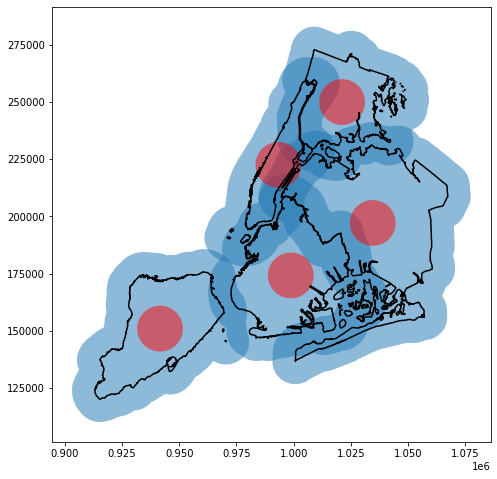

In [ ]:
ax= gdf['Buffered-G'].plot(alpha=0.5, figsize=(8,8))

gdf['Buffered-C'].plot(ax=ax,color = 'red', alpha=0.5)

gdf['Boundary of Polygon'].plot(ax=ax, color='k')

In [ ]:
gdf['Within'] = gdf['Buffered-C'].within(gdf)

In [ ]:
gdf['Within']

BoroName
Staten Island     True
Queens            True
Brooklyn         False
Manhattan        False
Bronx            False
Name: Within, dtype: bool

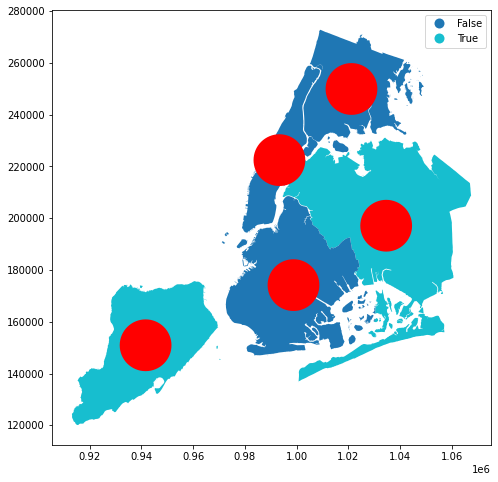

In [ ]:
ax = gdf.plot('Within', figsize=(12,8),legend=True, categorical=True)

gdf['Buffered-C'].plot(ax=ax, color='red')

In [ ]:
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
gdf_4326 = gdf.to_crs('EPSG:4326')

In [ ]:
gdf_4326.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,B-Area,Boundary of Polygon,Centroid of Polygon,Distance,Buffered-G,Buffered-C,Touches Brooklyn Buffer,Within
BoroName,,,,,,,,,,,,,
Staten Island,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",1.623822e+09,"MULTILINESTRING ((970217.022 145643.332, 97022...",POINT (941639.450 150931.991),0.000000,"POLYGON ((903234.894 123347.784, 903178.057 12...","POLYGON ((951639.450 150931.991, 951591.298 14...",True,True
Queens,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...",3.045214e+09,"MULTILINESTRING ((1029606.077 156073.814, 1029...",POINT (1034578.078 197116.604),103781.535276,"POLYGON ((1066963.473 157602.686, 1067059.264 ...","POLYGON ((1044578.078 197116.604, 1044529.926 ...",True,True
Brooklyn,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...",1.937478e+09,"MULTILINESTRING ((1021176.479 151374.797, 1021...",POINT (998769.115 174169.761),61674.893421,"POLYGON ((962679.120 165570.385, 962651.330 16...","POLYGON ((1008769.115 174169.761, 1008720.962 ...",True,False
Manhattan,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",6.364712e+08,"MULTILINESTRING ((981219.056 188655.316, 98094...",POINT (993336.965 222451.437),88247.742789,"POLYGON ((980499.119 178448.735, 979864.868 17...","POLYGON ((1003336.965 222451.437, 1003288.812 ...",True,False
Bronx,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",1.186926e+09,"MULTILINESTRING ((1012821.806 229228.265, 1012...",POINT (1021174.790 249937.980),126996.283623,"POLYGON ((992724.911 240962.362, 992700.941 24...","POLYGON ((1031174.790 249937.980, 1031126.637 ...",False,False


In [ ]:
gdf_4326.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

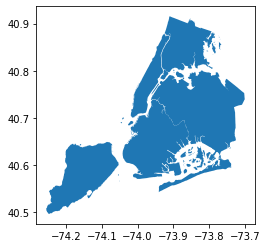

In [ ]:
gdf_4326.plot()

### Plotting World Map with Different CRS's.

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
world.head(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


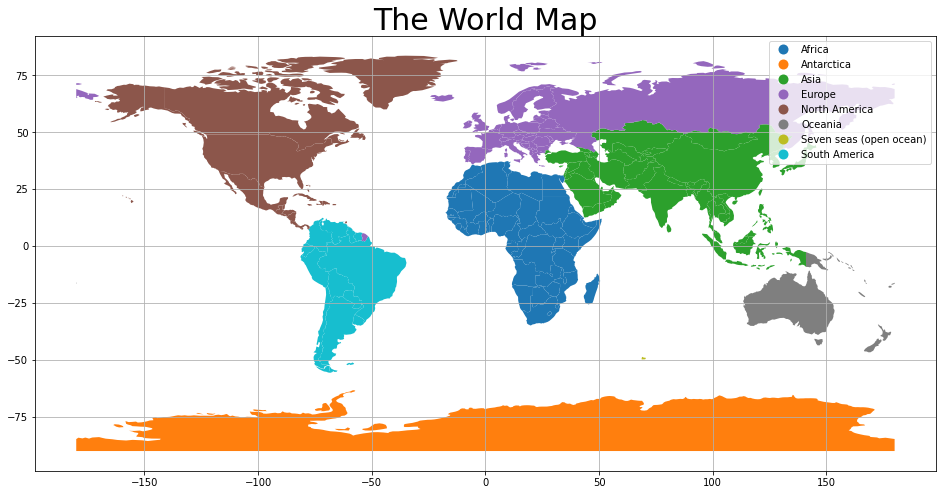

In [ ]:
ax = world.plot('continent',categorical=True,legend=True,figsize=(20,8))


plt.title('The World Map',size=30)
plt.grid()
# world['continent'].plot(ax=ax)

### IMPORTANT : Making a geodataframe from a DF with Lat-Longs.

In [ ]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [ ]:
df

,City,Country,Latitude,Longitude
0,Buenos Aires,Argentina,-34.58,-58.66
1,Brasilia,Brazil,-15.78,-47.91
2,Santiago,Chile,-33.45,-70.66
3,Bogota,Colombia,4.60,-74.08
4,Caracas,Venezuela,10.48,-66.86


A GeoDataFrame needs a shapely object. We use geopandas points_from_xy() to transform Longitude and Latitude into a list of shapely.Point objects and set it as a geometry while creating the GeoDataFrame. (note that points_from_xy() is an enhanced wrapper for [Point(x, y) for x, y in zip(df.Longitude, df.Latitude)])

In [ ]:
[Point(x,y) for x,y in zip(df['Latitude'] , df['Longitude'])]

In [ ]:
geometry_array = gpd.points_from_xy(df['Longitude'], df['Latitude'])
geometry_array

<GeometryArray>
Length: 5, dtype: geometry

In [ ]:
gdf_from_df = gpd.GeoDataFrame(df, geometry=geometry_array)

Finally plotting these on a world map.

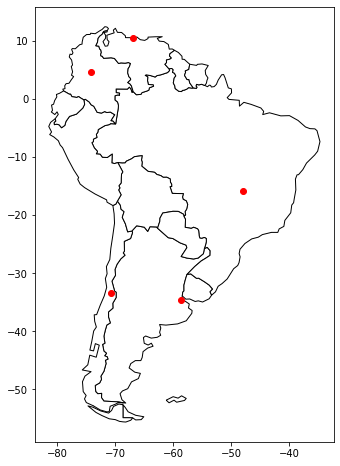

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black', figsize=(8,8))

# We can now plot our ``GeoDataFrame``.
gdf_from_df.plot(ax=ax, color='red')

plt.show()